In [ ]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [1]:
# !pip install -q tensorflow-gpu==2.0.0-rc0
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print()
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17952705123852308771
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11043017626957034282
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 427518207250503010
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7535729050
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3114177404973854105
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:65:00.0, compute capability: 6.1"
]

Default GPU Device: /device:GPU:0


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# tfds.disable_progress_bar()
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
from PIL import Image 
import numpy
import scipy.misc
import scipy.ndimage
import matplotlib.pyplot as plt

In [5]:
def dodge(front,back):
    result=front*255/(255-back) 
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')

def grayscale(rgb):
    return numpy.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [6]:
from PIL import ImageEnhance
from PIL import ImageOps

def enhance_image(original_image):
    enhanced_image = ImageEnhance.Contrast(original_image).enhance(1.)
    enhanced_image = ImageEnhance.Sharpness(enhanced_image).enhance(4.0)
    enhanced_image = ImageEnhance.Color(enhanced_image).enhance(0.0)
    #enhanced_image = ImageOps.invert(enhanced_image)
    
    plt.subplot(121)
    plt.title('Original')
    plt.imshow(numpy.array(original_image))

    plt.subplot(122)
    plt.title('Enhanced')
    plt.imshow(numpy.array(enhanced_image))
    
    return enhanced_image

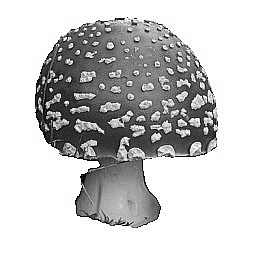

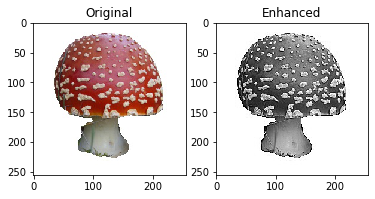

In [7]:
image = Image.open('train_photos/n12998815_9340.jpg')
enhance_image(image)

In [8]:
# LOAD TRAINING PHOTOS
folder = "/media/leytonblackler/ECS-local/scratch/blacklleyt/Semester2/sketchypic/datasets/train/photo"
file_names = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

# TEMPORARILY LIMIT HOW MANY IMAGES ARE LOADED
file_names = file_names[:400]

print("Loading {0} photo training images...".format(len(file_names)))
train_photos = []
labels = []
count = 1
for file_name in file_names:
    print("Loading image " + str(count) + " of " + str(len(file_names)) + "...")
    len(file_names)
    image = Image.open(folder + '/' + file_name)
    # image = enhance_image(image)
    train_photos.append(numpy.array(image))
    labels.append(0)
    count = count + 1;
print("Successfully loaded training photos!\n")
train_photos_ds = tf.data.Dataset.from_tensor_slices((train_photos, labels))

# LOAD TRAINING SKETCHES
folder = "/media/leytonblackler/ECS-local/scratch/blacklleyt/Semester2/sketchypic/datasets/train/sketch"
file_names = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

# TEMPORARILY LIMIT HOW MANY IMAGES ARE LOADED
file_names = file_names[:400]

print("Loading {0} sketch training images...".format(len(file_names)))
train_sketches = []
labels = []
count = 1
for file_name in file_names:
    print("Loading image " + str(count) + " of " + str(len(file_names)) + "...")
    image = Image.open(folder + '/' + file_name)
    train_sketches.append(numpy.array(image))
    labels.append(1)
    count = count + 1;
print("Successfully loaded training sketches!\n")
train_sketches_ds = tf.data.Dataset.from_tensor_slices((train_sketches, labels))

# LOAD TEST PHOTOS
folder = "/media/leytonblackler/ECS-local/scratch/blacklleyt/Semester2/sketchypic/datasets/test/photo"
file_names = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Loading {0} photo testing images...".format(len(file_names)))
test_photos = []
labels = []
count = 1
for file_name in file_names:
    print("Loading image " + str(count) + " of " + str(len(file_names)) + "...")
    image = Image.open(folder + '/' + file_name)
    # image = enhance_image(image)
    test_photos.append(numpy.array(image))
    labels.append(0)
    count = count + 1;
print("Successfully loaded testing photos!\n")
test_photos_ds = tf.data.Dataset.from_tensor_slices((test_photos, labels))

# LOAD TEST SKETCHES
folder = "/media/leytonblackler/ECS-local/scratch/blacklleyt/Semester2/sketchypic/datasets/test/sketch"
file_names = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Loading {0} sketch testing images...".format(len(file_names)))
test_sketches = []
labels = []
count = 1
for file_name in file_names:
#     print("Loading image " + str(count) + " of " + str(len(file_names)) + "...")
    image = Image.open(folder + '/' + file_name)
    test_sketches.append(numpy.array(image))
    labels.append(1)
#     count = count + 1;
print("Successfully loaded testing sketches!\n")
test_sketches_ds = tf.data.Dataset.from_tensor_slices((test_sketches, labels))
    
# Show first image in the array to confirm the images were loaded.
# Image.fromarray(train_photos[0]).show()

Loading 400 photo training images...
Loading image 1 of 400...
Loading image 2 of 400...
Loading image 3 of 400...
Loading image 4 of 400...
Loading image 5 of 400...
Loading image 6 of 400...
Loading image 7 of 400...
Loading image 8 of 400...
Loading image 9 of 400...
Loading image 10 of 400...
Loading image 11 of 400...
Loading image 12 of 400...
Loading image 13 of 400...
Loading image 14 of 400...
Loading image 15 of 400...
Loading image 16 of 400...
Loading image 17 of 400...
Loading image 18 of 400...
Loading image 19 of 400...
Loading image 20 of 400...
Loading image 21 of 400...
Loading image 22 of 400...
Loading image 23 of 400...
Loading image 24 of 400...
Loading image 25 of 400...
Loading image 26 of 400...
Loading image 27 of 400...
Loading image 28 of 400...
Loading image 29 of 400...
Loading image 30 of 400...
Loading image 31 of 400...
Loading image 32 of 400...
Loading image 33 of 400...
Loading image 34 of 400...
Loading image 35 of 400...
Loading image 36 of 400...


Loading image 368 of 400...
Loading image 369 of 400...
Loading image 370 of 400...
Loading image 371 of 400...
Loading image 372 of 400...
Loading image 373 of 400...
Loading image 374 of 400...
Loading image 375 of 400...
Loading image 376 of 400...
Loading image 377 of 400...
Loading image 378 of 400...
Loading image 379 of 400...
Loading image 380 of 400...
Loading image 381 of 400...
Loading image 382 of 400...
Loading image 383 of 400...
Loading image 384 of 400...
Loading image 385 of 400...
Loading image 386 of 400...
Loading image 387 of 400...
Loading image 388 of 400...
Loading image 389 of 400...
Loading image 390 of 400...
Loading image 391 of 400...
Loading image 392 of 400...
Loading image 393 of 400...
Loading image 394 of 400...
Loading image 395 of 400...
Loading image 396 of 400...
Loading image 397 of 400...
Loading image 398 of 400...
Loading image 399 of 400...
Loading image 400 of 400...
Successfully loaded training photos!

Loading 400 sketch training images...


Loading image 398 of 400...
Loading image 399 of 400...
Loading image 400 of 400...
Successfully loaded training sketches!

Loading 12 photo testing images...
Loading image 1 of 12...
Loading image 2 of 12...
Loading image 3 of 12...
Loading image 4 of 12...
Loading image 5 of 12...
Loading image 6 of 12...
Loading image 7 of 12...
Loading image 8 of 12...
Loading image 9 of 12...
Loading image 10 of 12...
Loading image 11 of 12...
Loading image 12 of 12...
Successfully loaded testing photos!

Loading 12 sketch testing images...
Successfully loaded testing sketches!



In [9]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [10]:
def random_crop(image):
    cropped_image = tf.image.random_crop(image, size=[IMG_HEIGHT, IMG_WIDTH, 3])
    return cropped_image

In [11]:
# normalizing the images to [-1, 1]
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

In [12]:
def random_jitter(image):
    # resizing to 286 x 286 x 3
    image = tf.image.resize(image, [286, 286],method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    # randomly cropping to 256 x 256 x 3
    image = random_crop(image)

    # random mirroring
    image = tf.image.random_flip_left_right(image)
    
    return image

In [13]:
def preprocess_image_train(image, label):
    image = random_jitter(image)
    image = normalize(image)
    return image

In [14]:
def preprocess_image_test(image, label):
    image = normalize(image)
    return image

In [15]:
train_photos_ds = train_photos_ds.map(
    preprocess_image_train,
    num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(1)

train_sketches_ds = train_sketches_ds.map(
    preprocess_image_train,
    num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(1)

test_photos_ds = test_photos_ds.map(
    preprocess_image_test,
    num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(1)

test_sketches_ds = test_sketches_ds.map(
    preprocess_image_test,
    num_parallel_calls=AUTOTUNE).cache().shuffle(BUFFER_SIZE).batch(1)


In [16]:
sample_photo = next(iter(train_photos_ds))
sample_sketch = next(iter(train_sketches_ds))

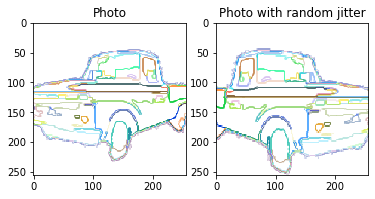

In [17]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(sample_photo[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Photo with random jitter')
plt.imshow(random_jitter(sample_photo[0]) * 0.5 + 0.5)

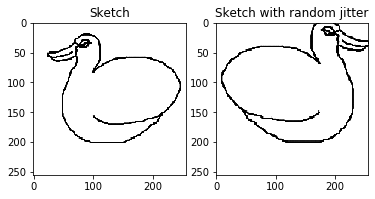

In [18]:
plt.subplot(121)
plt.title('Sketch')
plt.imshow(sample_sketch[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Sketch with random jitter')
plt.imshow(random_jitter(sample_sketch[0]) * 0.5 + 0.5)

In [19]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


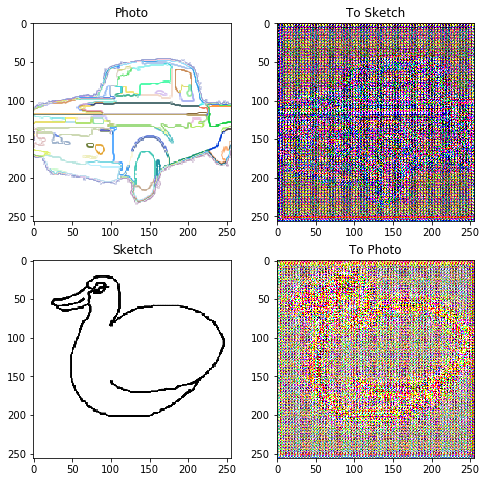

In [20]:
to_sketch = generator_g(sample_photo)
to_photo = generator_f(sample_sketch)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_photo, to_sketch, sample_sketch, to_photo]
title = ['Photo', 'To Sketch', 'Sketch', 'To Photo']

for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    if i % 2 == 0:
        plt.imshow(imgs[i][0] * 0.5 + 0.5)
    else:
        plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

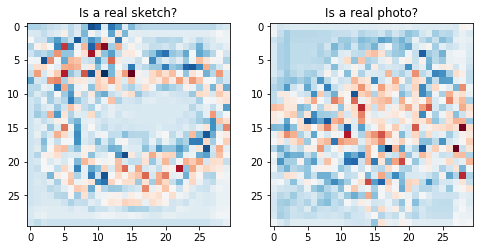

In [21]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is a real sketch?')
plt.imshow(discriminator_y(sample_sketch)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is a real photo?')
plt.imshow(discriminator_x(sample_photo)[0, ..., -1], cmap='RdBu_r')

plt.show()

In [22]:
LAMBDA = 10

In [23]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [24]:
def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    
    total_disc_loss = real_loss + generated_loss
    
    return total_disc_loss * 0.5

In [25]:
def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

In [26]:
def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    
    return LAMBDA * loss1

In [27]:
def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

In [28]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [29]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [30]:
EPOCHS = 50

In [59]:
def generate_images(model, test_input, filename):
    prediction = model(test_input)
    
    # image = Image.fromarray(prediction[0] * 0.5 + 0.5)
    # image.save("./predictions/" + filename + ".jpg")
    size = 256
    my_dpi = 80
    plt.figure(figsize=(size/my_dpi, size/my_dpi), dpi=my_dpi)
    plt.axis('off')
    

    display_list = [prediction[0]]
    # display_list = [test_input[0], prediction[0]]
    # title = ['Input Image', 'Predicted Image']

    # for i in range(2):
        # plt.subplot(1, 2, i+1)
        # plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        # plt.imshow(display_list[i] * 0.5 + 0.5)
        # plt.axis('off')
        
    plt.imshow(prediction[0] * 0.5 + 0.5)
    
    plt.savefig('./predictions/' + filename + '.png', dpi=my_dpi)
    
    # plt.subplot(1, 2, i+1)
    # plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    
    
        
        
    plt.show()

In [32]:
@tf.function
def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than
    # once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.
    
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)

        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)

        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)

        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)

        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)

        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
    
        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
    
        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)
  
    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, 
                                        generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, 
                                        generator_f.trainable_variables)
  
    discriminator_x_gradients = tape.gradient(disc_x_loss, 
                                            discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, 
                                            discriminator_y.trainable_variables)
  
    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, 
                                            generator_g.trainable_variables))

    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, 
                                            generator_f.trainable_variables))
  
    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))
  
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))

Training epoch 1 of 50.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


........................................

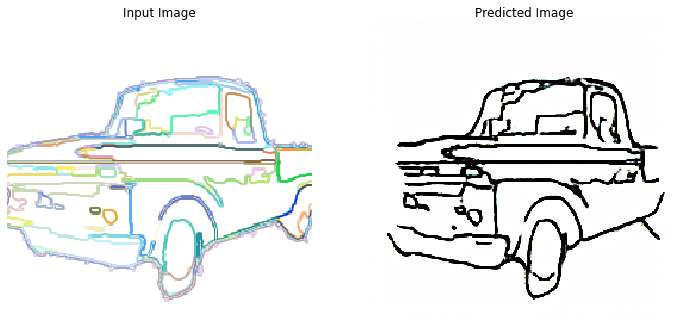

Time taken for epoch 1 is 227.94064784049988 sec

Training epoch 2 of 50.
........................................

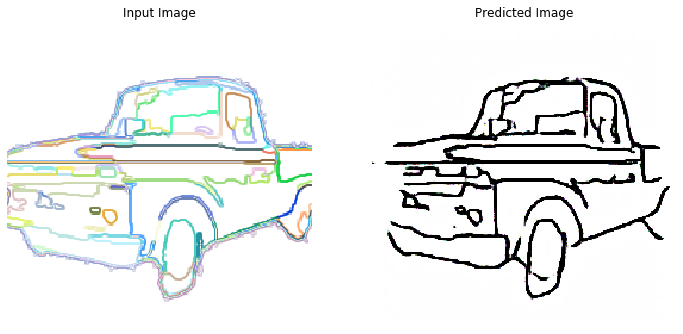

Time taken for epoch 2 is 193.3724274635315 sec

Training epoch 3 of 50.
........................................

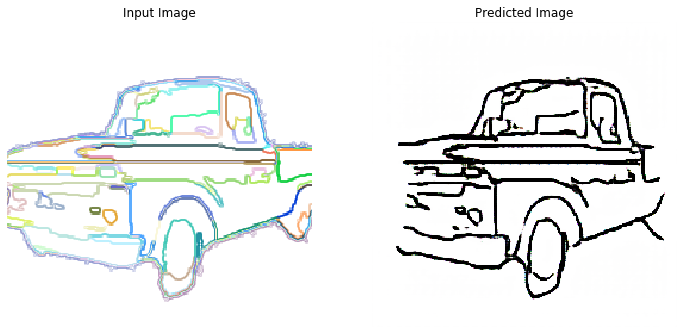

Time taken for epoch 3 is 192.88837504386902 sec

Training epoch 4 of 50.
........................................

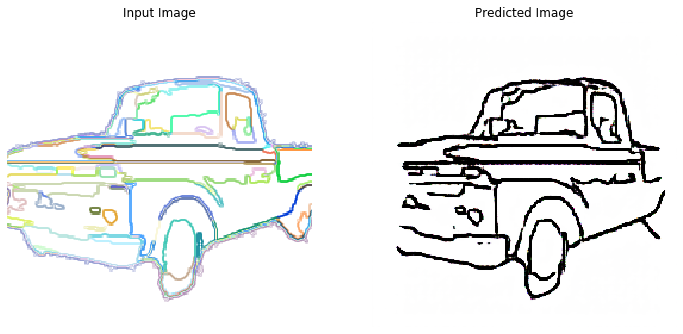

Time taken for epoch 4 is 192.35224318504333 sec

Training epoch 5 of 50.
........................................

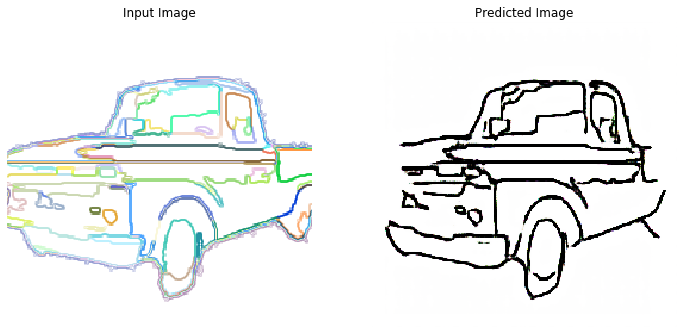

Saving checkpoint for epoch 5 at ./checkpoints/train/ckpt-11
Time taken for epoch 5 is 194.57590246200562 sec

Training epoch 6 of 50.
........................................

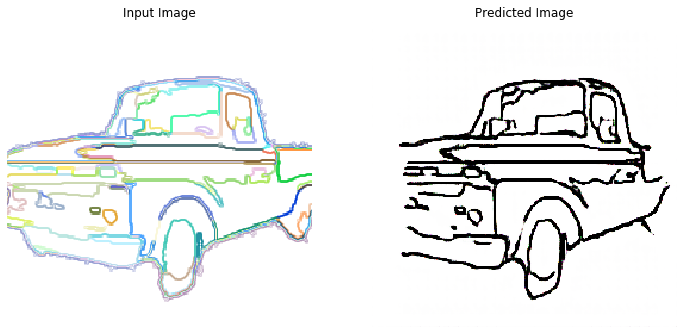

Time taken for epoch 6 is 192.23097562789917 sec

Training epoch 7 of 50.
........................................

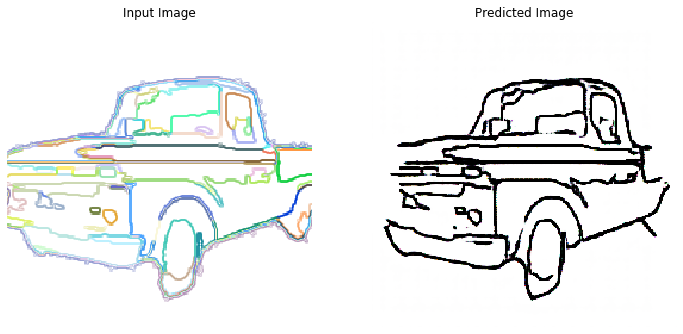

Time taken for epoch 7 is 192.27944374084473 sec

Training epoch 8 of 50.
........................................

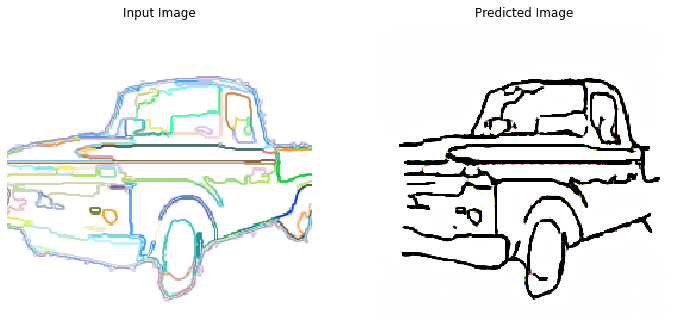

Time taken for epoch 8 is 192.12285804748535 sec

Training epoch 9 of 50.
........................................

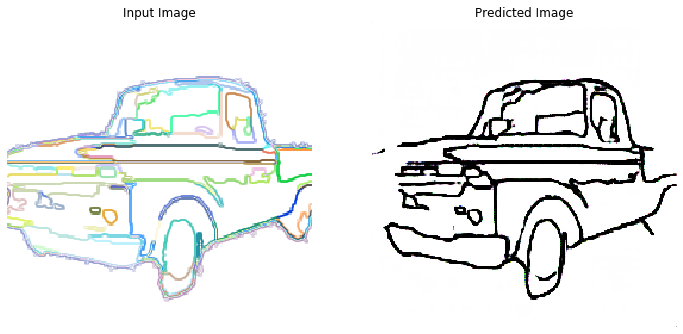

Time taken for epoch 9 is 192.19878602027893 sec

Training epoch 10 of 50.
........................................

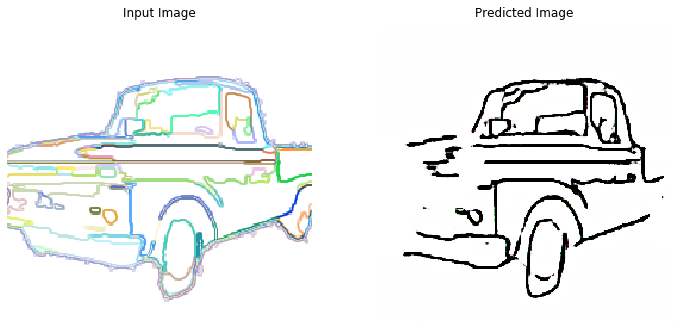

Saving checkpoint for epoch 10 at ./checkpoints/train/ckpt-12
Time taken for epoch 10 is 194.490407705307 sec

Training epoch 11 of 50.
........................................

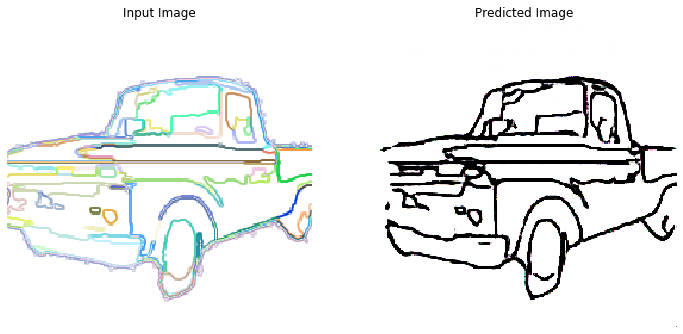

Time taken for epoch 11 is 192.27617812156677 sec

Training epoch 12 of 50.
........................................

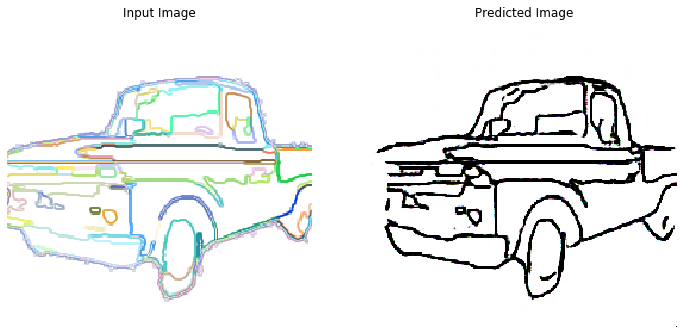

Time taken for epoch 12 is 192.34309124946594 sec

Training epoch 13 of 50.
........................................

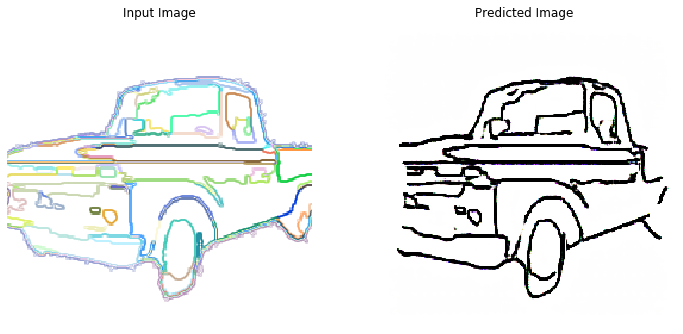

Time taken for epoch 13 is 192.3133580684662 sec

Training epoch 14 of 50.
........................................

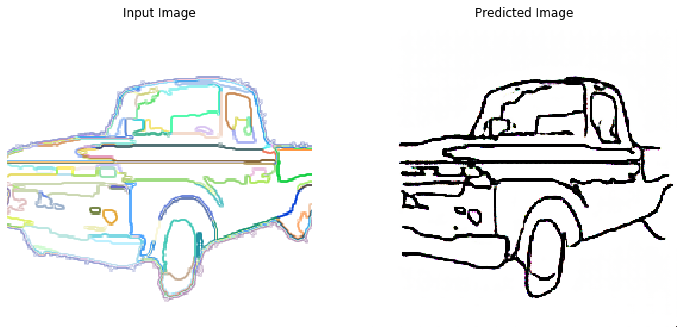

Time taken for epoch 14 is 192.25983905792236 sec

Training epoch 15 of 50.
........................................

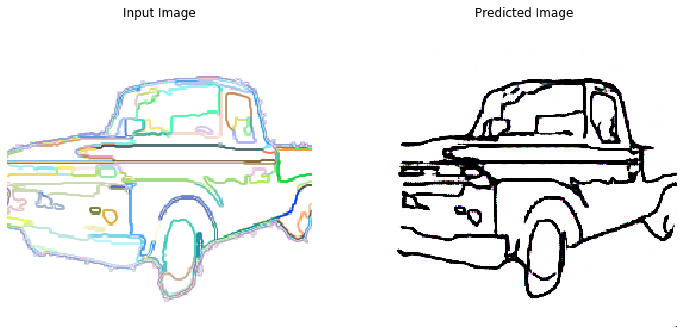

Saving checkpoint for epoch 15 at ./checkpoints/train/ckpt-13
Time taken for epoch 15 is 194.41632628440857 sec

Training epoch 16 of 50.
........................................

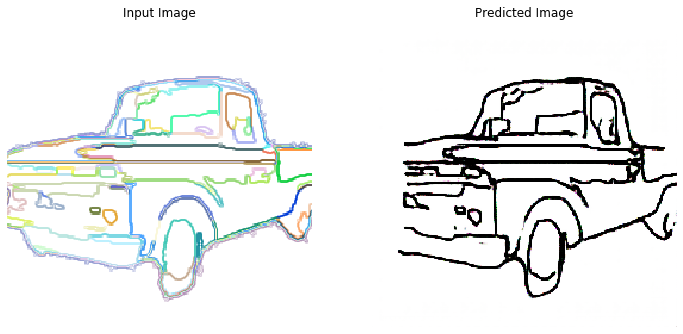

Time taken for epoch 16 is 192.2413833141327 sec

Training epoch 17 of 50.
........................................

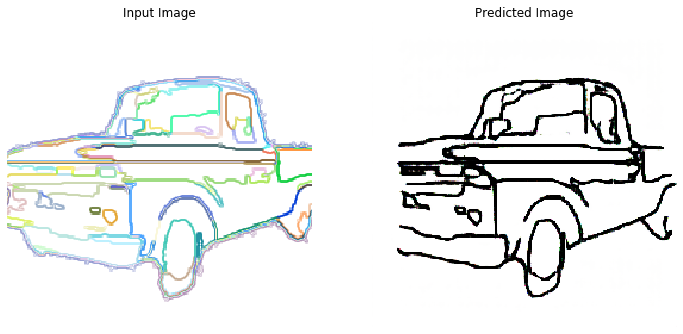

Time taken for epoch 17 is 192.29993081092834 sec

Training epoch 18 of 50.
........................................

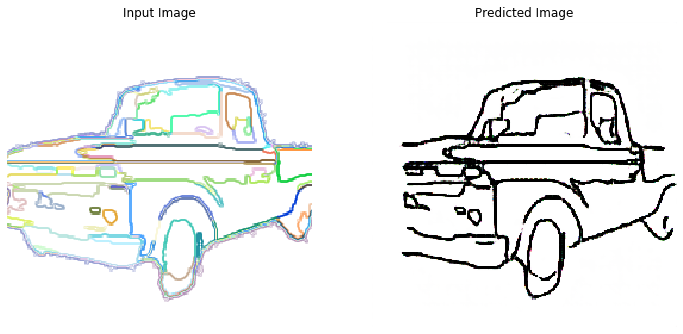

Time taken for epoch 18 is 192.240238904953 sec

Training epoch 19 of 50.
........................................

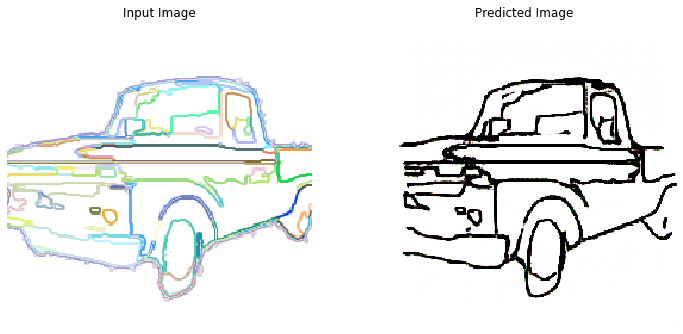

Time taken for epoch 19 is 192.09728240966797 sec

Training epoch 20 of 50.
........................................

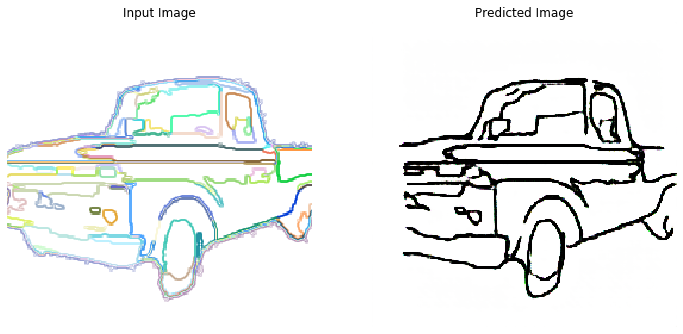

Saving checkpoint for epoch 20 at ./checkpoints/train/ckpt-14
Time taken for epoch 20 is 194.35704278945923 sec

Training epoch 21 of 50.
........................................

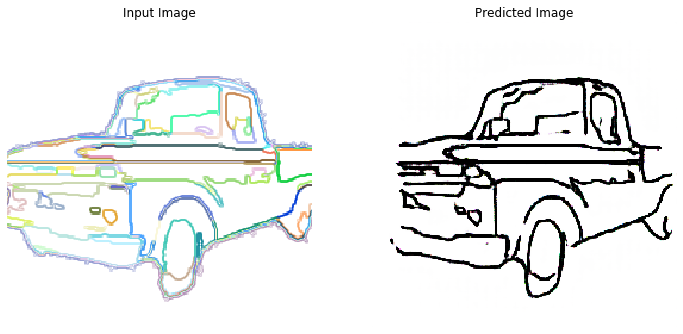

Time taken for epoch 21 is 192.1599690914154 sec

Training epoch 22 of 50.
........................................

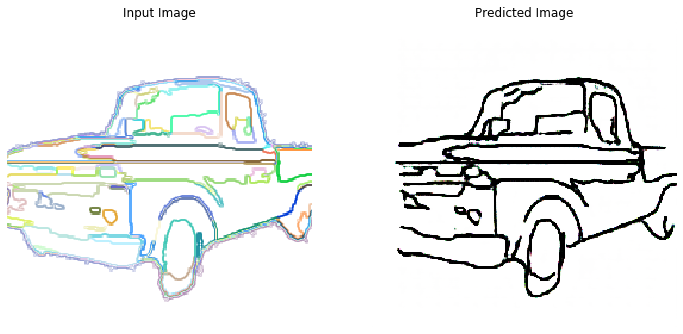

Time taken for epoch 22 is 192.1902403831482 sec

Training epoch 23 of 50.
........................................

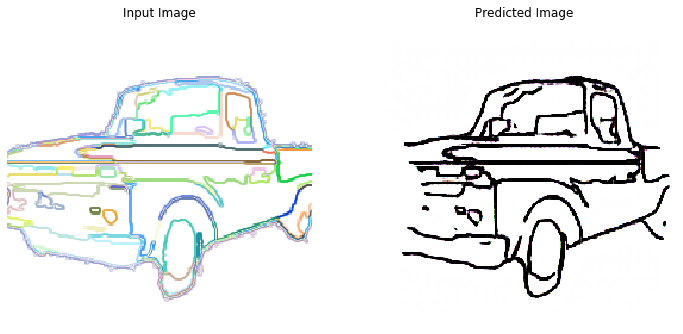

Time taken for epoch 23 is 192.14350748062134 sec

Training epoch 24 of 50.
........................................

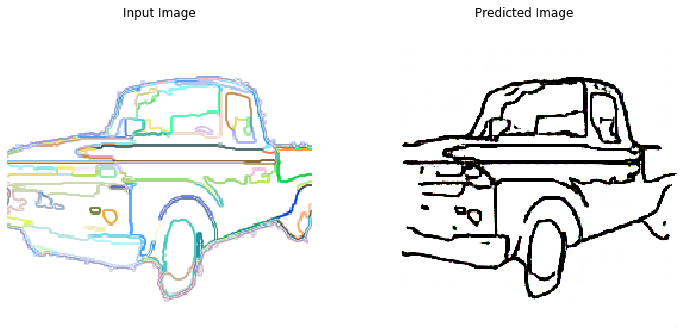

Time taken for epoch 24 is 192.14721965789795 sec

Training epoch 25 of 50.
........................................

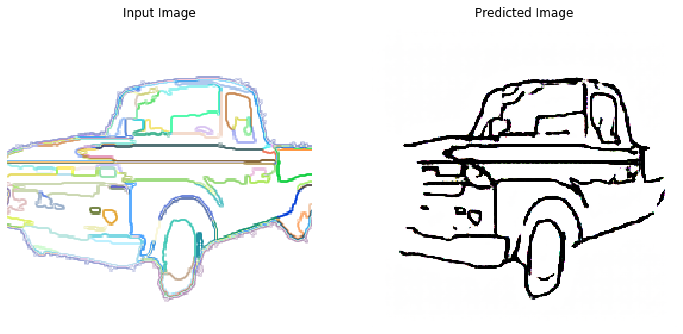

Saving checkpoint for epoch 25 at ./checkpoints/train/ckpt-15
Time taken for epoch 25 is 194.4016604423523 sec

Training epoch 26 of 50.
........................................

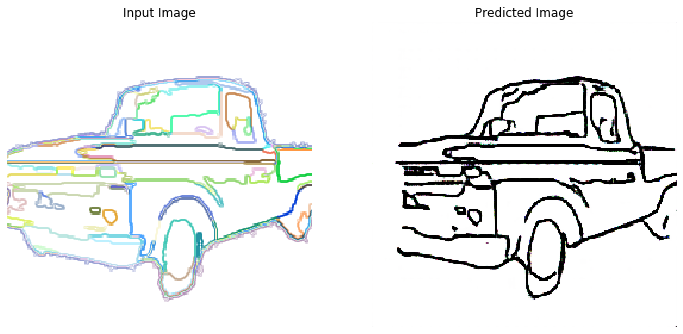

Time taken for epoch 26 is 192.1623077392578 sec

Training epoch 27 of 50.
........................................

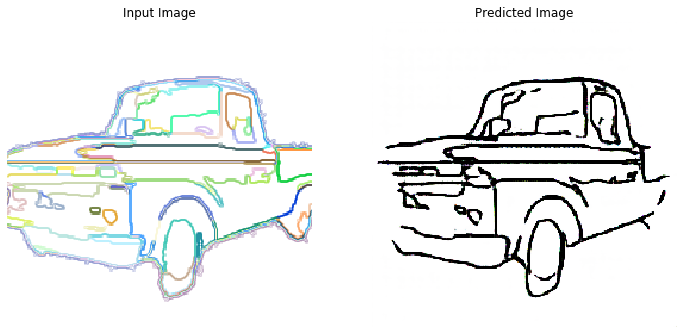

Time taken for epoch 27 is 192.02071976661682 sec

Training epoch 28 of 50.
........................................

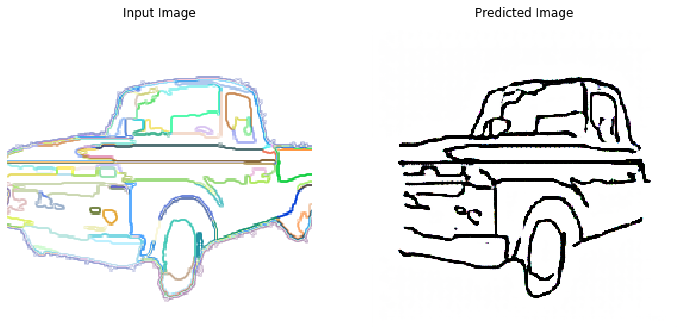

Time taken for epoch 28 is 192.020920753479 sec

Training epoch 29 of 50.
........................................

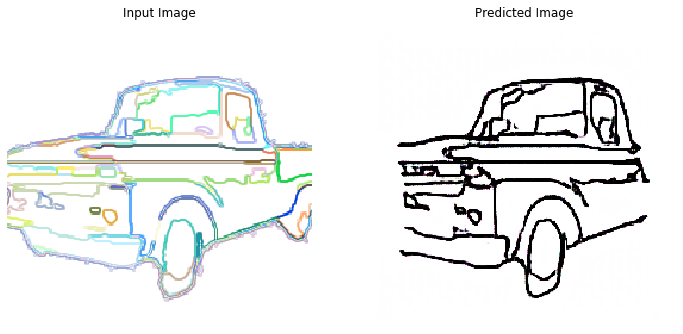

Time taken for epoch 29 is 192.0645170211792 sec

Training epoch 30 of 50.
........................................

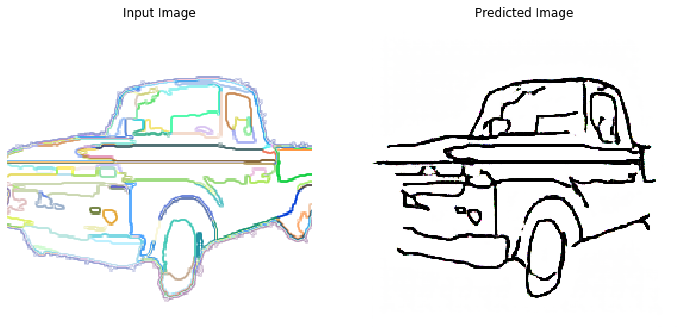

Saving checkpoint for epoch 30 at ./checkpoints/train/ckpt-16
Time taken for epoch 30 is 194.28599786758423 sec

Training epoch 31 of 50.
........................................

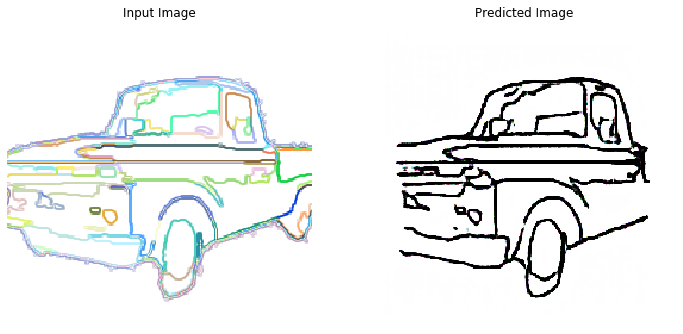

Time taken for epoch 31 is 192.12766408920288 sec

Training epoch 32 of 50.
........................................

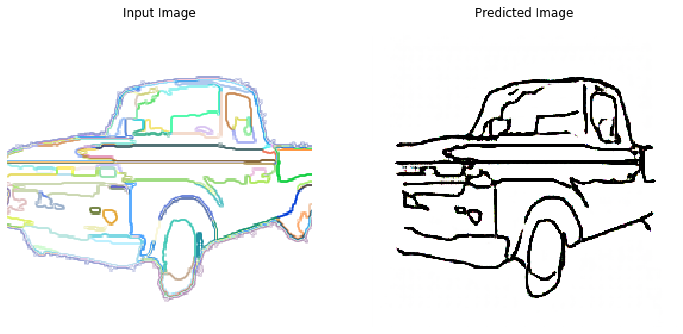

Time taken for epoch 32 is 192.094096660614 sec

Training epoch 33 of 50.
........................................

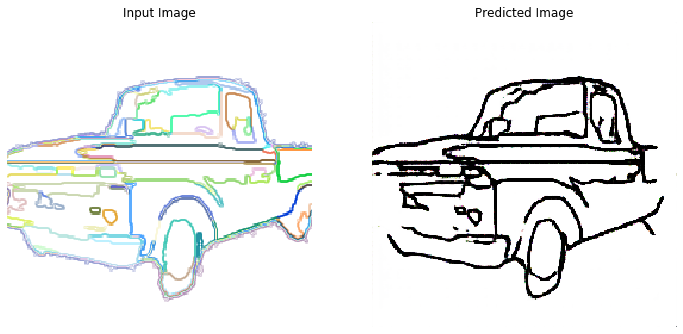

Time taken for epoch 33 is 192.1850826740265 sec

Training epoch 34 of 50.
........................................

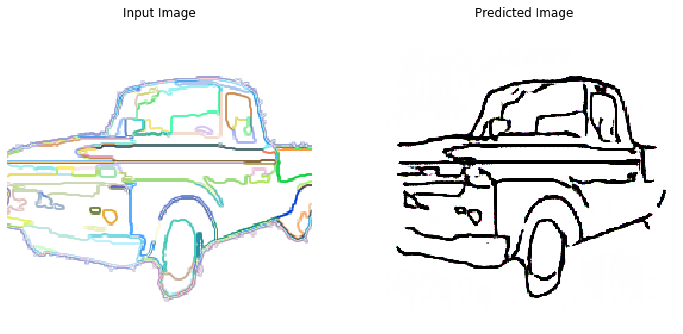

Time taken for epoch 34 is 192.24033856391907 sec

Training epoch 35 of 50.
........................................

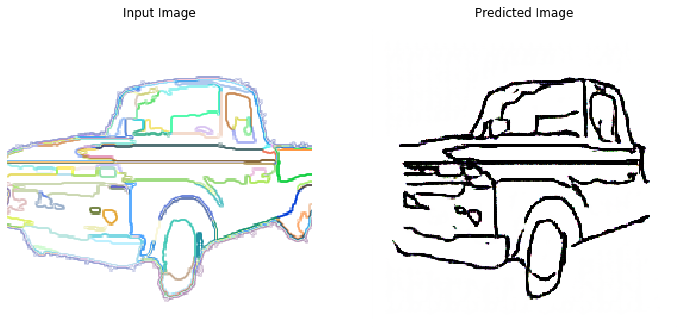

Saving checkpoint for epoch 35 at ./checkpoints/train/ckpt-17
Time taken for epoch 35 is 194.586932182312 sec

Training epoch 36 of 50.
........................................

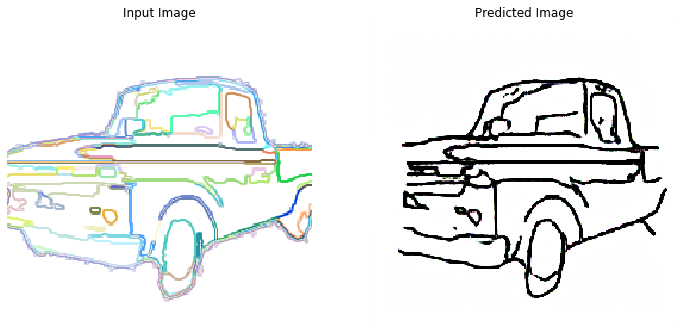

Time taken for epoch 36 is 192.30742120742798 sec

Training epoch 37 of 50.
........................................

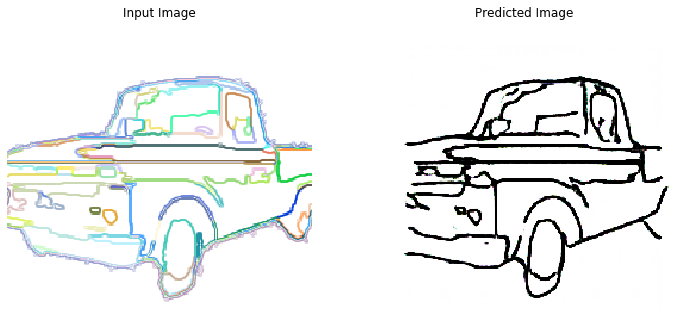

Time taken for epoch 37 is 192.36474680900574 sec

Training epoch 38 of 50.
........................................

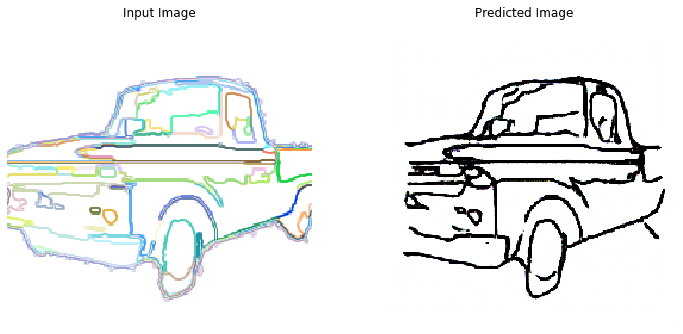

Time taken for epoch 38 is 192.2374873161316 sec

Training epoch 39 of 50.
........................................

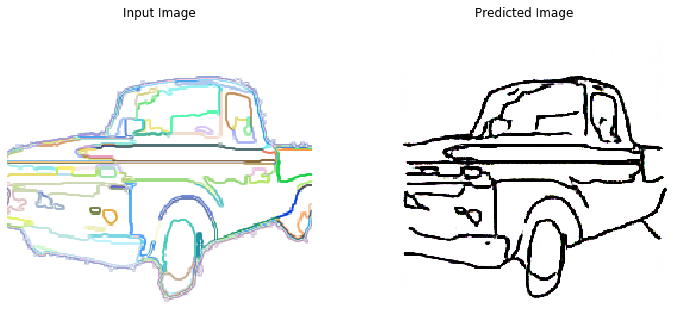

Time taken for epoch 39 is 192.2035961151123 sec

Training epoch 40 of 50.
........................................

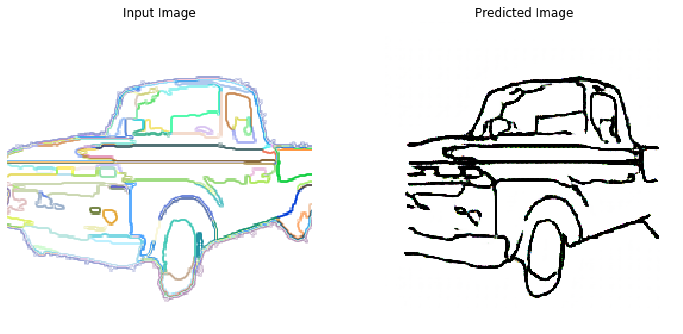

Saving checkpoint for epoch 40 at ./checkpoints/train/ckpt-18
Time taken for epoch 40 is 194.37080645561218 sec

Training epoch 41 of 50.
........................................

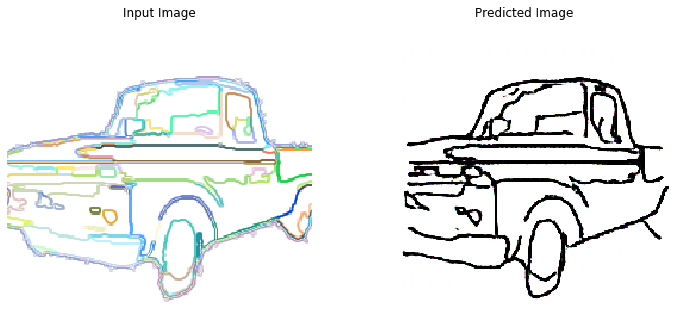

Time taken for epoch 41 is 192.12244606018066 sec

Training epoch 42 of 50.
........................................

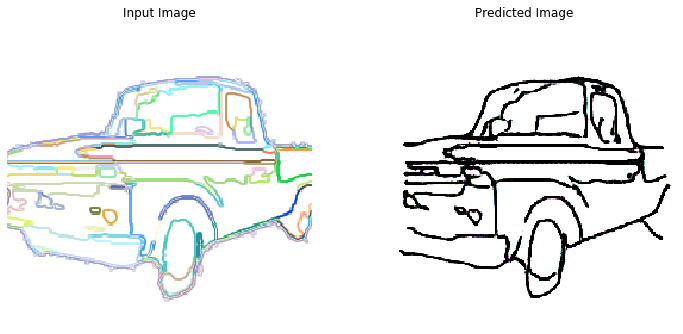

Time taken for epoch 42 is 192.13061928749084 sec

Training epoch 43 of 50.
........................................

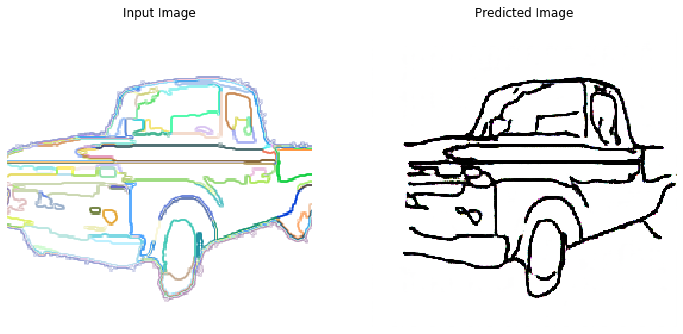

Time taken for epoch 43 is 192.14474773406982 sec

Training epoch 44 of 50.
........................................

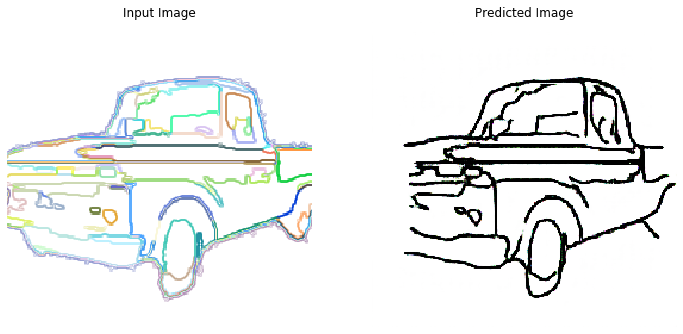

Time taken for epoch 44 is 192.1033627986908 sec

Training epoch 45 of 50.
........................................

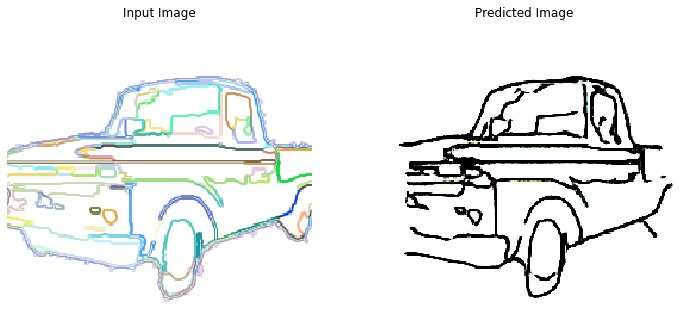

Saving checkpoint for epoch 45 at ./checkpoints/train/ckpt-19
Time taken for epoch 45 is 194.26346683502197 sec

Training epoch 46 of 50.
........................................

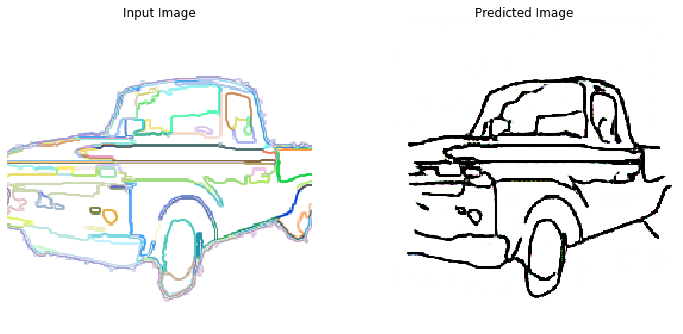

Time taken for epoch 46 is 192.00022554397583 sec

Training epoch 47 of 50.
........................................

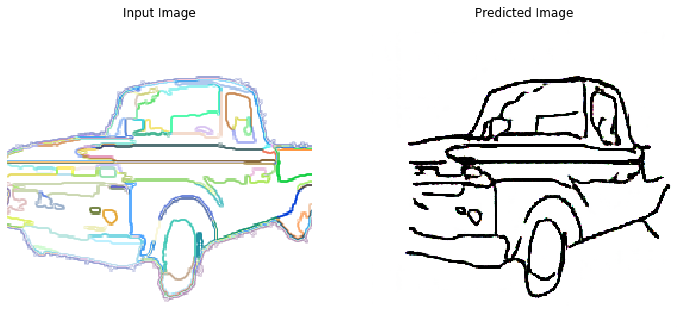

Time taken for epoch 47 is 191.98786807060242 sec

Training epoch 48 of 50.
........................................

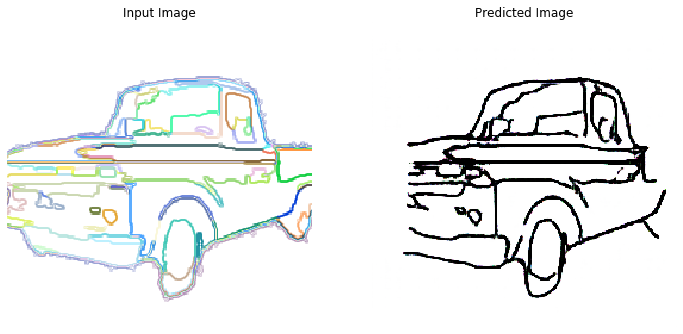

Time taken for epoch 48 is 191.81910109519958 sec

Training epoch 49 of 50.
........................................

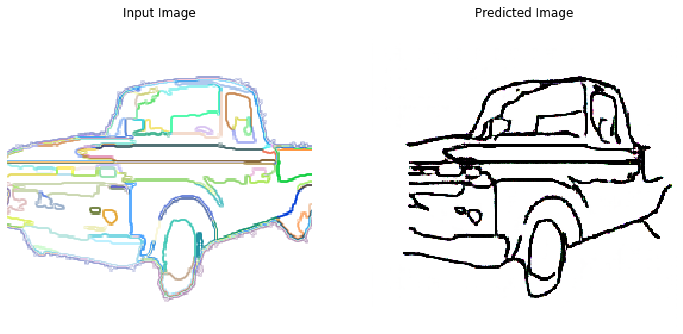

Time taken for epoch 49 is 191.7269184589386 sec

Training epoch 50 of 50.
........................................

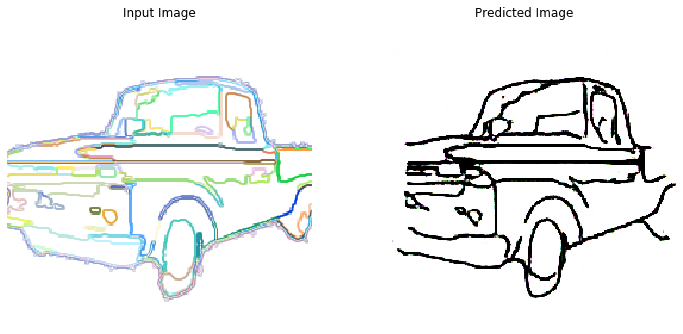

Saving checkpoint for epoch 50 at ./checkpoints/train/ckpt-20
Time taken for epoch 50 is 194.0099868774414 sec



In [33]:
for epoch in range(EPOCHS):
    start = time.time()
    print('Training epoch {} of {}.'.format(epoch + 1, EPOCHS))
    n = 0
    for image_x, image_y in tf.data.Dataset.zip((train_photos_ds, train_sketches_ds)):
        train_step(image_x, image_y)
        if n % 10 == 0:
            print ('.', end='')
        n+=1

    # Using a consistent image (sample_photo) so that the progress of the model
    # is clearly visible.
    generate_images(generator_g, sample_photo)

    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))

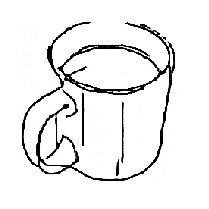

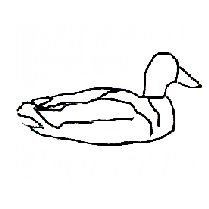

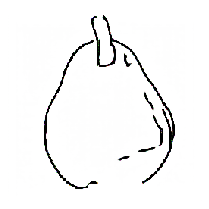

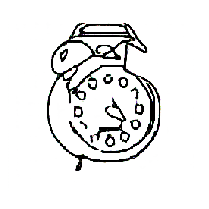

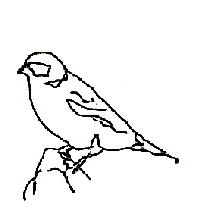

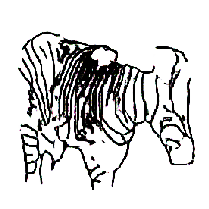

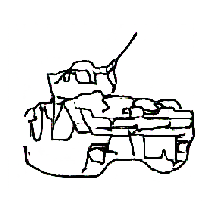

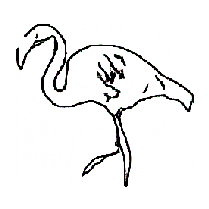

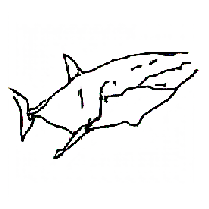

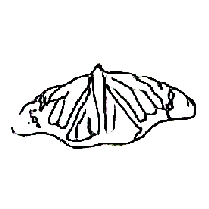

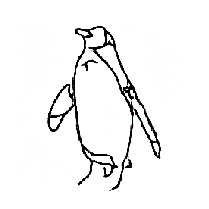

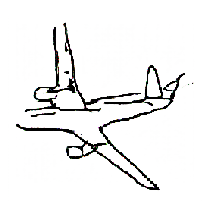

In [60]:
count = 1;
for inp in test_photos_ds.take(12):
    filename = "prediction_" + str(count);
    generate_images(generator_g, inp, filename)
    count = count + 1;

In [ ]:
for inp in test_sketches_ds.take(5):
    generate_images(generator_f, inp)

In [ ]:
generate_images(generator_g, numpy.array(Image.open('train_photos/n12998815_21193.jpg')))